<a href="https://colab.research.google.com/github/Jarvis-X/Aerial-Robotics-Course-Projects/blob/main/CS498HW2Rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np


# initial states, zero initial angle and angular velocity
x0 = [0, 0]
# inertia
I = 1.0
# half length of the rod
l = 1.0
# time step
dt = 0.001
# desired state
des_state = np.array([np.pi/2, 0])

image.png

In [61]:
# step function for the motion of the rod
def step_rotate(state, f):
    theta, omega = state
    # the only external force f that generates a torque
    tau = l*f
    # for our case, the cross product reduces to 0
    domega = tau/I
    dstate = np.array([omega, domega])
    new_state = state + dstate*dt
    # make sure the range of theta is in (-pi, pi]
    if new_state[0] <= -np.pi:
        new_state[0] += np.pi
    elif new_state[0] > np.pi:
        new_state[0] -= np.pi
    return new_state

image.png

In [62]:
Kp = 1.5
Kd = 3.0
def control(state, des_state):
    err = des_state - state
    f = np.max([Kp*err[0]+Kd*err[1], 0])
    return f

In [63]:
def simulate(init_state, time_out=10):
    length = int(time_out//dt)
    state_log = np.zeros((length, 2))
    state = init_state
    count = 0
    while count < length:
        state_log[count, :] = state
        f = control(state, des_state)
        state = step_rotate(state, f)
        count += 1
    return state_log

In [69]:
import matplotlib.pyplot as plt
state_log = simulate(x0)
print(len(state_log))

plt.grid()
plt.plot(np.linspace(0, 10, int(10//dt)), state_log[:, 0])

9999


In [57]:
!pip install JSAnimation

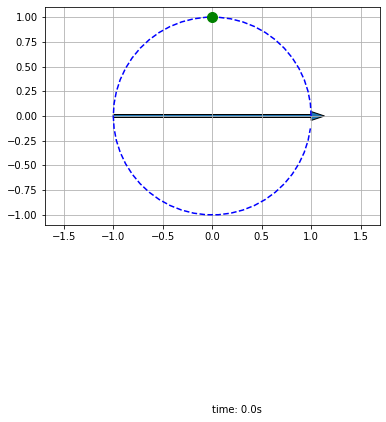

In [65]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML

path = np.zeros((50, 2))
for i in range(len(path)):
    path[i, :] = np.array([l*np.cos(i/50*2*np.pi), l*np.sin(i/50*2*np.pi)])

target = np.array([l*np.cos(des_state[0]), l*np.sin(des_state[0])])
fig, ax = plt.subplots()
plt.axis('equal')
sampling = int(50)

def animate(t):
    ax.clear()
    
    # Path
    plt.plot(path[:,0], path[:,1], 'b--')
    # target
    plt.plot(target[0], target[1], 'og', markersize=10)
    # trajectory
    #plt.plot(np.cos(state_log[::sampling,0]), np.sin(state_log[::sampling,0]), 'r--')
    
    # current position
    plt.arrow(-np.cos(state_log[sampling*t,0]), -np.sin(state_log[sampling*t,0]), 2*np.cos(state_log[sampling*t,0]), 2*np.sin(state_log[sampling*t,0]), width=0.03)
    # plt.arrow(state_log[sampling*t,0], state_log[sampling*t,1], state_log[sampling*t,2], state_log[sampling*t,3])
    plt.text(1,1,"time: {:.1f}s".format(t*dt*sampling))
    
    
time = int(len(state_log)/sampling)
anim = animation.FuncAnimation(fig, animate, frames=time, interval=dt*1000*sampling)

HTML(anim.to_jshtml())